In [79]:
import numpy as np
import torch 
import matplotlib.pyplot as plt 

In [107]:
import help

In [114]:
from torchvision import datasets,transforms 
from torch import nn
from torch import optim
import torch.nn.functional as F


In [81]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [82]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


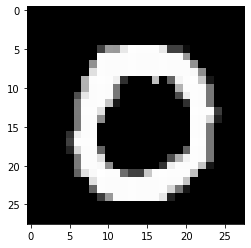

In [83]:
# to see what one images look like 
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r');


In [84]:
def activation(x):
    return 1/(1 + torch.exp(-x))

#Flatten in the input 
inputs = images.view(images.shape[0], -1)

#Create the parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
output = torch.mm(h, w2) + b2

In [85]:
inputs.shape, output.shape 

(torch.Size([64, 784]), torch.Size([64, 10]))

In [86]:
output 

tensor([[-7.8573e+00,  3.1242e+00, -1.8663e+01,  8.4336e+00,  1.4021e+00,
         -1.0145e+00,  3.6487e+00,  9.0754e+00,  4.5454e+00, -5.5710e+00],
        [-2.3771e+01,  2.0400e+01, -1.6115e+01,  8.3153e+00, -2.6922e+00,
         -6.3167e-01,  5.7056e+00,  1.0547e+01, -4.5698e+00, -1.3940e+00],
        [-4.4255e-01,  2.4342e+00, -4.5546e+00,  6.7410e+00,  4.9116e+00,
          1.1635e+00, -8.9738e-01,  2.8976e+00, -7.9379e+00,  1.0501e+01],
        [-1.3175e+01,  5.7863e+00, -5.4585e+00,  1.8262e+01,  4.0557e+00,
         -2.1196e+00,  2.1434e+00,  3.0608e+00, -5.3587e+00, -1.7424e+00],
        [-8.2585e+00,  1.3105e+01, -1.2516e+01, -2.7649e+00, -3.2306e+00,
          5.6594e+00,  5.0019e+00,  1.4912e+01, -5.4087e+00, -1.7195e-01],
        [-1.6978e+01,  1.2643e+01, -6.4464e+00,  7.2320e+00,  6.2063e-01,
          5.0587e+00,  3.0982e+00,  4.0492e+00, -1.2548e+01, -3.7374e+00],
        [-1.3678e+01,  1.0433e+01, -1.2403e+01,  1.1943e+01,  3.7666e+00,
         -7.7398e-02,  7.9157e-0

In [87]:
x =torch.sum(torch.exp(output), dim = 1)
x

tensor([1.3496e+04, 7.2380e+08, 3.7373e+04, 8.5368e+07, 3.4848e+06, 3.1111e+05,
        1.8772e+05, 8.5507e+01, 9.8746e+02, 1.8032e+04, 4.4951e+05, 6.8649e+08,
        9.0061e+07, 6.1168e+05, 1.9280e+08, 4.4152e+04, 1.2475e+06, 2.8107e+03,
        9.2877e+04, 7.4350e+04, 1.6071e+08, 1.7891e+05, 2.1187e+06, 3.0883e+05,
        2.2711e+05, 3.3760e+04, 5.0997e+04, 3.3608e+06, 5.2308e+06, 2.0913e+06,
        2.9781e+07, 1.1293e+08, 2.8230e+05, 1.0150e+06, 4.1117e+07, 8.4408e+02,
        7.0537e+03, 7.5451e+04, 2.1239e+06, 3.5739e+06, 3.4903e+07, 2.4023e+05,
        5.4557e+08, 6.9987e+05, 1.6548e+07, 8.3319e+05, 5.3275e+06, 7.4947e+09,
        7.3105e+06, 4.3432e+05, 4.8744e+04, 3.2903e+05, 1.5191e+05, 6.8717e+06,
        1.5934e+06, 3.3547e+03, 4.7397e+09, 9.6920e+08, 2.0456e+05, 1.6114e+05,
        6.3413e+05, 8.1692e+04, 1.0349e+08, 1.3957e+04])

In [88]:
# see the different and how it been flattened
v = x.view(-1,1)
v.shape, x .shape 

(torch.Size([64, 1]), torch.Size([64]))

In [89]:
y = torch.exp(output)
y

tensor([[3.8691e-04, 2.2741e+01, 7.8494e-09, 4.5990e+03, 4.0638e+00, 3.6259e-01,
         3.8424e+01, 8.7374e+03, 9.4196e+01, 3.8069e-03],
        [4.7453e-11, 7.2376e+08, 1.0030e-07, 4.0857e+03, 6.7733e-02, 5.3170e-01,
         3.0053e+02, 3.8063e+04, 1.0360e-02, 2.4809e-01],
        [6.4240e-01, 1.1407e+01, 1.0519e-02, 8.4642e+02, 1.3585e+02, 3.2011e+00,
         4.0764e-01, 1.8131e+01, 3.5694e-04, 3.6357e+04],
        [1.8968e-06, 3.2580e+02, 4.2599e-03, 8.5368e+07, 5.7726e+01, 1.2008e-01,
         8.5281e+00, 2.1345e+01, 4.7068e-03, 1.7510e-01],
        [2.5905e-04, 4.9153e+05, 3.6663e-06, 6.2980e-02, 3.9535e-02, 2.8698e+02,
         1.4870e+02, 2.9929e+06, 4.4775e-03, 8.4202e-01],
        [4.2338e-08, 3.0949e+05, 1.5863e-03, 1.3829e+03, 1.8601e+00, 1.5739e+02,
         2.2158e+01, 5.7353e+01, 3.5514e-06, 2.3816e-02],
        [1.1473e-06, 3.3945e+04, 4.1057e-06, 1.5367e+05, 4.3231e+01, 9.2552e-01,
         2.2069e+00, 2.0725e-01, 5.1533e+01, 1.7174e-06],
        [8.7212e-08, 1.2854

In [90]:
# taking the softmax value 

def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

probabilities = softmax(output)

print(probabilities.shape)
print(probabilities.sum(dim = 1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building a Network

In [91]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [92]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [93]:
# Buiding a more succint and concise network with torch.nn.functional as F

class Network2(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [94]:
model2 = Network2()
model2

Network2(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

## Building a network with Relu activation functions 

In [95]:

class ReluNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model_relu = ReluNetwork()
model_relu

ReluNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [96]:
# Set biases to all zeros
model_relu.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [97]:
# sample from random normal with standard dev = 0.01
model_relu.fc1.weight.data.normal_(std=0.01)

tensor([[-8.3591e-03, -1.9129e-03,  1.1098e-03,  ..., -9.3227e-03,
         -1.4592e-02,  5.8278e-03],
        [ 4.8012e-03,  5.1196e-03, -5.4163e-03,  ...,  8.0728e-04,
          2.0628e-03, -3.2473e-04],
        [ 1.4600e-03, -9.8281e-03, -6.2956e-03,  ...,  9.9551e-03,
          8.5933e-04, -2.0368e-02],
        ...,
        [ 6.2487e-03, -4.7894e-03, -1.2560e-03,  ...,  1.5042e-02,
          1.5385e-02,  1.3606e-02],
        [-7.5860e-05, -6.5732e-03,  1.6238e-02,  ..., -1.4689e-02,
          9.2132e-03,  2.1241e-02],
        [-1.5640e-04,  1.1030e-02,  1.9897e-02,  ...,  9.8978e-03,
         -5.7485e-04, -1.4179e-03]])

### Let see how the network respond when we pass an image

In [98]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py


'wget' is not recognized as an internal or external command,
operable program or batch file.


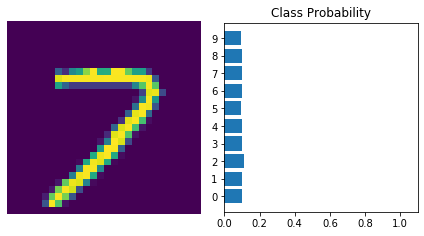

In [108]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model_relu.forward(images[img_idx,:])

img = images[img_idx]
help.view_classify(img.view(1, 28, 28), ps)

### Using Sequential Network

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


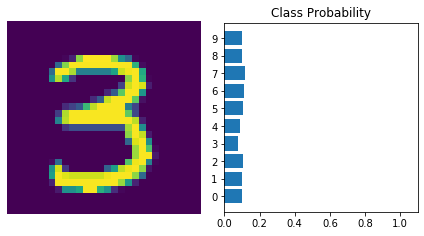

In [111]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
help.view_classify(images[0].view(1, 28, 28), ps)

## Traning a Network

In [116]:

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0058, -0.0210, -0.0248,  ..., -0.0036,  0.0058,  0.0078],
        [ 0.0106, -0.0078,  0.0309,  ..., -0.0012,  0.0167, -0.0278],
        [-0.0220,  0.0305,  0.0059,  ..., -0.0090, -0.0228,  0.0156],
        ...,
        [ 0.0162, -0.0054,  0.0104,  ..., -0.0321, -0.0238,  0.0129],
        [-0.0320, -0.0307,  0.0162,  ..., -0.0295, -0.0214, -0.0077],
        [ 0.0275,  0.0292, -0.0014,  ...,  0.0057,  0.0077,  0.0143]],
       requires_grad=True)
Gradient - tensor([[-1.7225e-03, -1.7225e-03, -1.7225e-03,  ..., -1.7225e-03,
         -1.7225e-03, -1.7225e-03],
        [ 2.2389e-03,  2.2389e-03,  2.2389e-03,  ...,  2.2389e-03,
          2.2389e-03,  2.2389e-03],
        [ 2.5671e-05,  2.5671e-05,  2.5671e-05,  ...,  2.5671e-05,
          2.5671e-05,  2.5671e-05],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.0046e-03,  1.0046e-03,  1.0046e-03,  ...,  1.0046e

In [117]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0058, -0.0210, -0.0248,  ..., -0.0035,  0.0058,  0.0078],
        [ 0.0106, -0.0078,  0.0309,  ..., -0.0012,  0.0167, -0.0279],
        [-0.0220,  0.0305,  0.0059,  ..., -0.0090, -0.0228,  0.0156],
        ...,
        [ 0.0162, -0.0054,  0.0104,  ..., -0.0321, -0.0238,  0.0129],
        [-0.0320, -0.0307,  0.0162,  ..., -0.0295, -0.0214, -0.0077],
        [ 0.0275,  0.0292, -0.0014,  ...,  0.0057,  0.0077,  0.0143]],
       requires_grad=True)


In [118]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8960598183593262
Training loss: 0.8502849824647151
Training loss: 0.5411784145623636
Training loss: 0.4424822520313741
Training loss: 0.3927747938456312


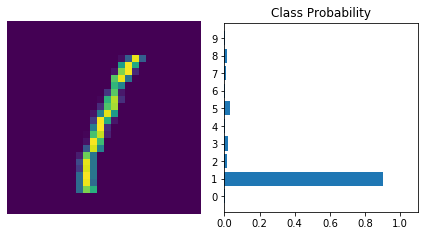

In [120]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
help.view_classify(img.view(1, 28, 28), ps)